In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd
datafix=pd.read_csv('alasanBeliProdukDanSentimen.csv',sep=';')

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
datafix

,Alasan_Membeli_Produk,sentiment
0,tidak karena lagi hemat,negative
1,iya tertarik dengan keuntungan yang ditawarkan,positive
2,tidak,negative
3,tidak,negative
4,tidak tetapi kalau aplikasi biasanya sudah mem...,neutral
...,...,...
67,tidak karena tidak perlu,negative
68,tergantung kebutuhan jika kebetulan produk ter...,neutral
69,iya namun hanya angan angan,neutral
70,tergantung kalau tertarik memakai tetapi kalau...,positive


In [ ]:
datafix['length'] = datafix['Alasan_Membeli_Produk'].apply(length)
datafix.head(10)

,Alasan_Membeli_Produk,sentiment,length
0,tidak karena lagi hemat,negative,23
1,iya tertarik dengan keuntungan yang ditawarkan,positive,46
2,tidak,negative,5
3,tidak,negative,5
4,tidak tetapi kalau aplikasi biasanya sudah mem...,neutral,50
5,terkadang karena tertarik sama penawarannya pr...,neutral,52
6,iya kalau dibutuhkan,neutral,20
7,tidak tidak ingin membeli,negative,25
8,sudah menggunakan karena butuh,positive,30
9,tidak ada,negative,9


In [ ]:
POS_data = datafix[datafix['sentiment'] == 'positive']
NEG_data = datafix[datafix['sentiment'] == 'negative']
NET_data = datafix[datafix['sentiment'] == 'neutral']

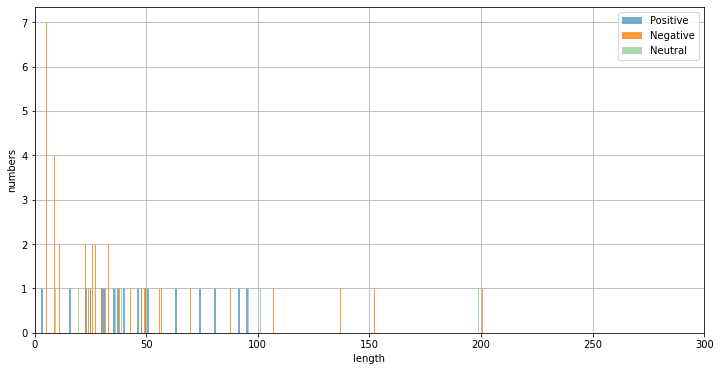

In [ ]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(POS_data['length'], alpha = 0.6, bins=bins, label='Positive')
plt.hist(NEG_data['length'], alpha = 0.8, bins=bins, label='Negative')
plt.hist(NET_data['length'], alpha = 0.4, bins=bins, label='Neutral')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.savefig('hubungan.png')
plt.show()

Dataset yang sudah balance

In [ ]:
import pandas as pd
datafix=pd.read_csv('datatraining.csv',sep=';')

In [ ]:
stop = {'di','karena','yang','dengan','atau','dan','kali','nya','ya'}
datafix['Alasan_Membeli_Produk'] = datafix['Alasan_Membeli_Produk'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# extracting the number of examples of each class
POS_len = datafix[datafix['sentiment'] == 'positive'].shape[0]
NEG_len = datafix[datafix['sentiment'] == 'negative'].shape[0]
NET_len = datafix[datafix['sentiment'] == 'neutral'].shape[0]

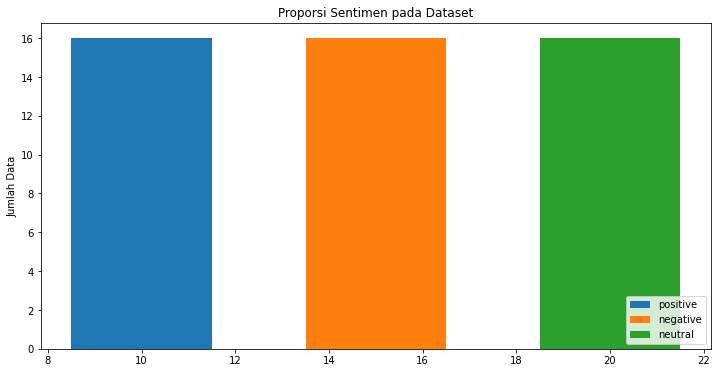

In [ ]:
# bar plot of the 3 classes
from matplotlib import pyplot as plt
plt.bar(10,POS_len,3, label="positive")
plt.bar(15,NEG_len,3, label="negative")
plt.bar(20,NET_len,3, label="neutral")
plt.legend(loc='lower right')
plt.ylabel('Jumlah Data')
plt.title('Proporsi Sentimen pada Dataset')
plt.savefig('barchart.png',bbox_inches='tight')
plt.show()

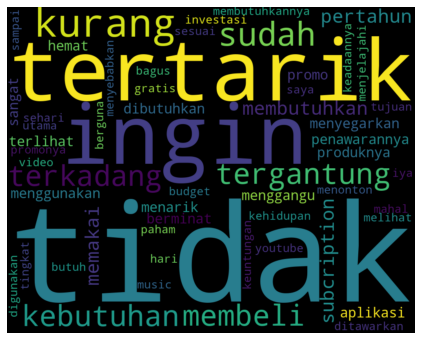

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [str (twts) for twts in datafix['Alasan_Membeli_Produk']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.savefig('wordcloud.png',bbox_inches='tight')
plt.show()

In [ ]:
a = datafix['Alasan_Membeli_Produk'] == ''
datafix[a].count()

Alasan_Membeli_Produk    0
sentiment                0
dtype: int64

In [ ]:
POS_data = datafix[datafix['sentiment'] == 'positive']
NEG_data = datafix[datafix['sentiment'] == 'negative']
NET_data = datafix[datafix['sentiment'] == 'neutral']

In [ ]:
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
positive_unigrams = defaultdict(int)

for tweet in POS_data['Alasan_Membeli_Produk']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
         
df_top_positive = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive = df_top_positive.rename(columns={0:'Word',1:'Count'})

# Bigrams
positive_bigrams = defaultdict(int)

for tweet in POS_data['Alasan_Membeli_Produk']:
    for word in generate_ngrams(tweet,n_gram=2):
        positive_bigrams[word] += 1
        
df_top_positive_bi = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_bi = df_top_positive_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
positive_trigrams = defaultdict(int)

for tweet in POS_data['Alasan_Membeli_Produk']:
    for word in generate_ngrams(tweet,n_gram=3):
        positive_trigrams[word] += 1
        
df_top_positive_tri = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_tri = df_top_positive_tri.rename(columns={0:'Word',1:'Count'})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


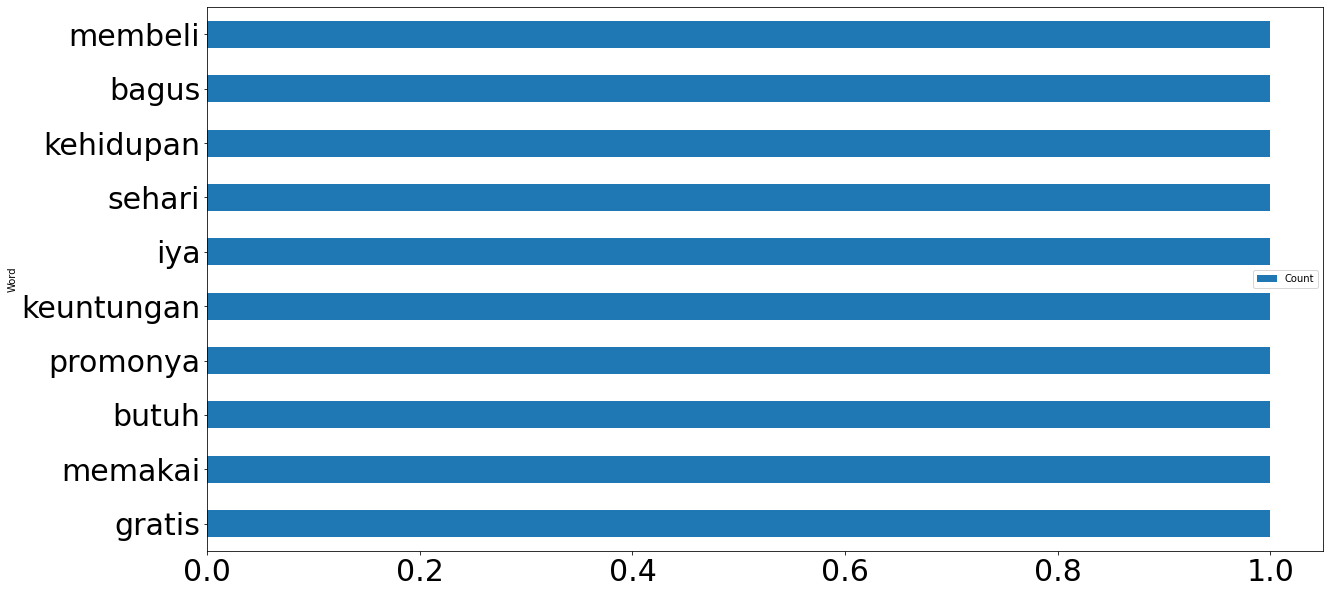

In [ ]:
df_top_positive.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('haha.png',bbox_inches='tight')

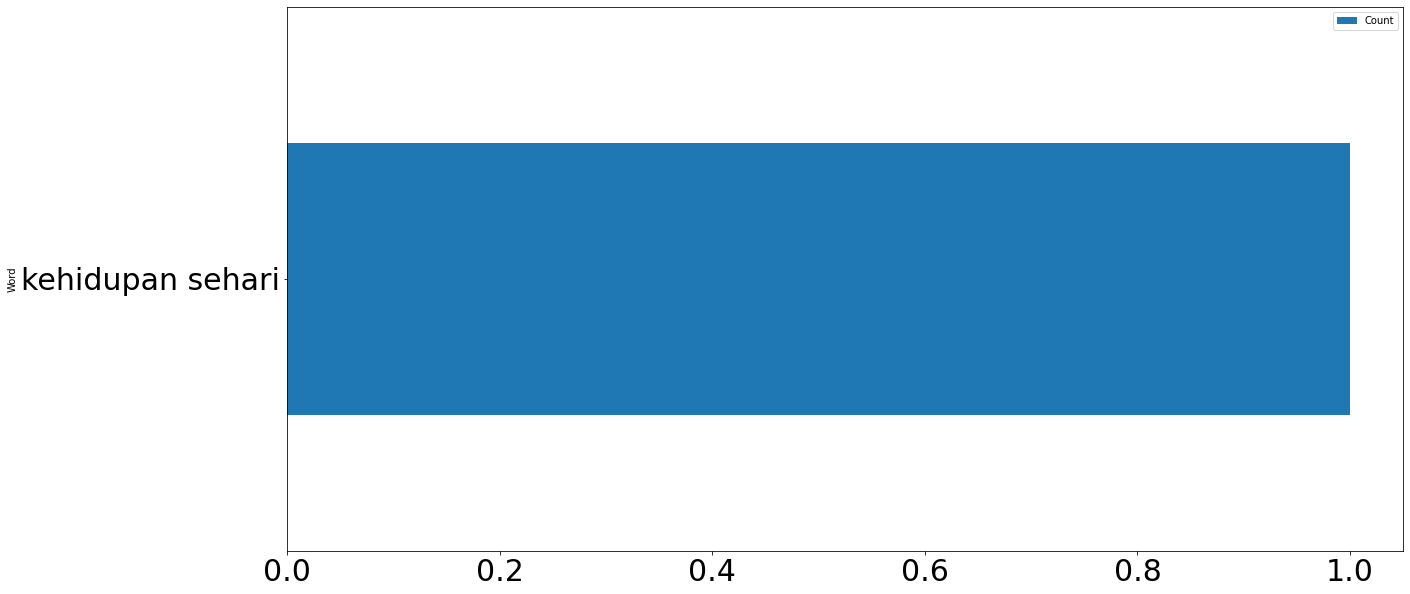

In [ ]:
df_top_positive_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('haha1.png',bbox_inches='tight')

In [ ]:
df_top_positive_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('haha2.png',bbox_inches='tight')

KeyError: ignored

Negative

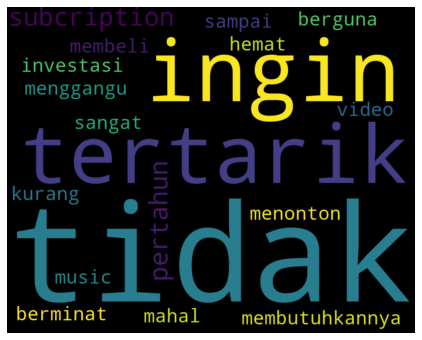

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NEG_data['Alasan_Membeli_Produk']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Unigrams
negative_unigrams = defaultdict(int)

for tweet in NEG_data['Alasan_Membeli_Produk']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
         
df_top_negative = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative = df_top_negative.rename(columns={0:'Word',1:'Count'})

# Bigrams
negative_bigrams = defaultdict(int)

for tweet in NEG_data['Alasan_Membeli_Produk']:
    for word in generate_ngrams(tweet,n_gram=2):
        negative_bigrams[word] += 1
        
df_top_negative_bi = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_bi = df_top_negative_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
negative_trigrams = defaultdict(int)

for tweet in NEG_data['Alasan_Membeli_Produk']:
    for word in generate_ngrams(tweet,n_gram=3):
        negative_trigrams[word] += 1
        
df_top_negative_tri = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_tri = df_top_negative_tri.rename(columns={0:'Word',1:'Count'})


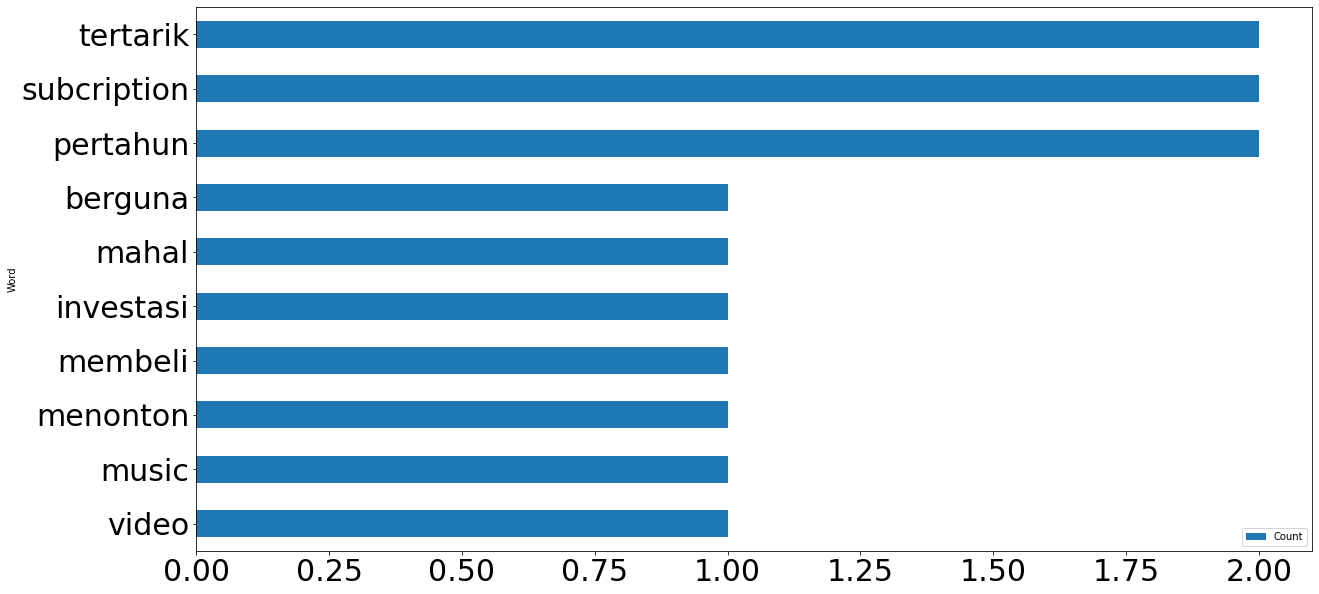

In [ ]:
df_top_negative.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi.png',bbox_inches='tight')

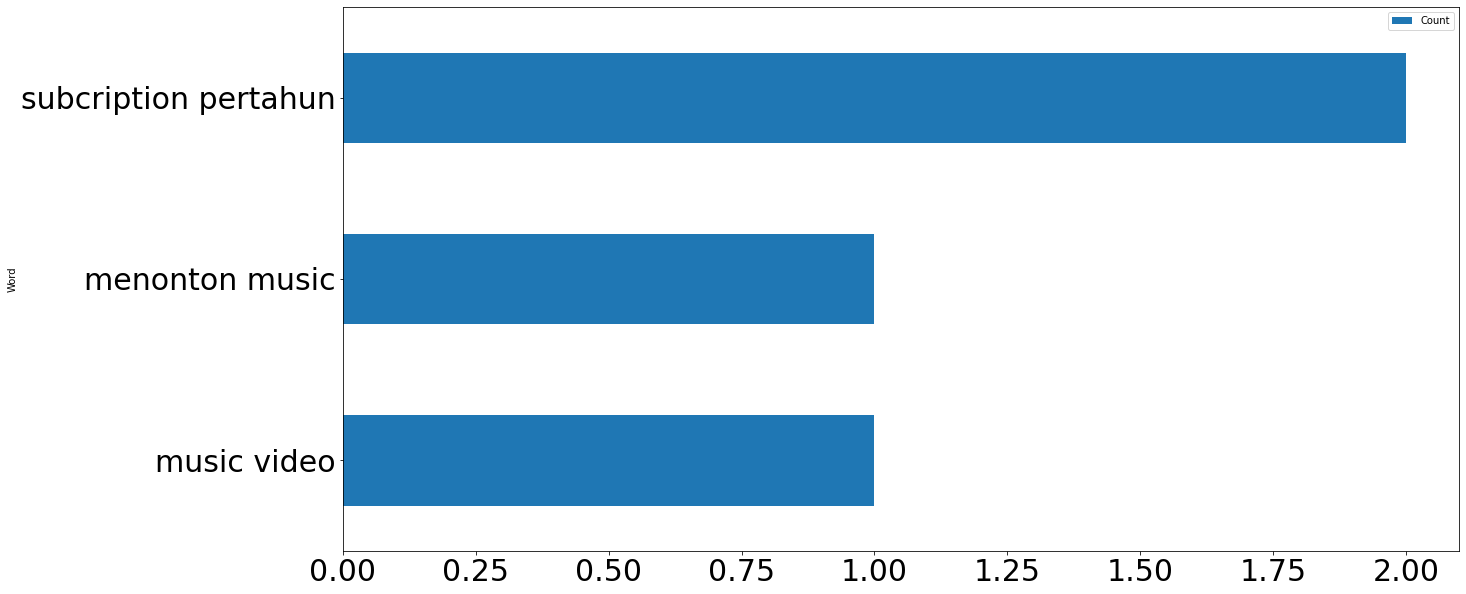

In [ ]:
df_top_negative_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi1.png',bbox_inches='tight')

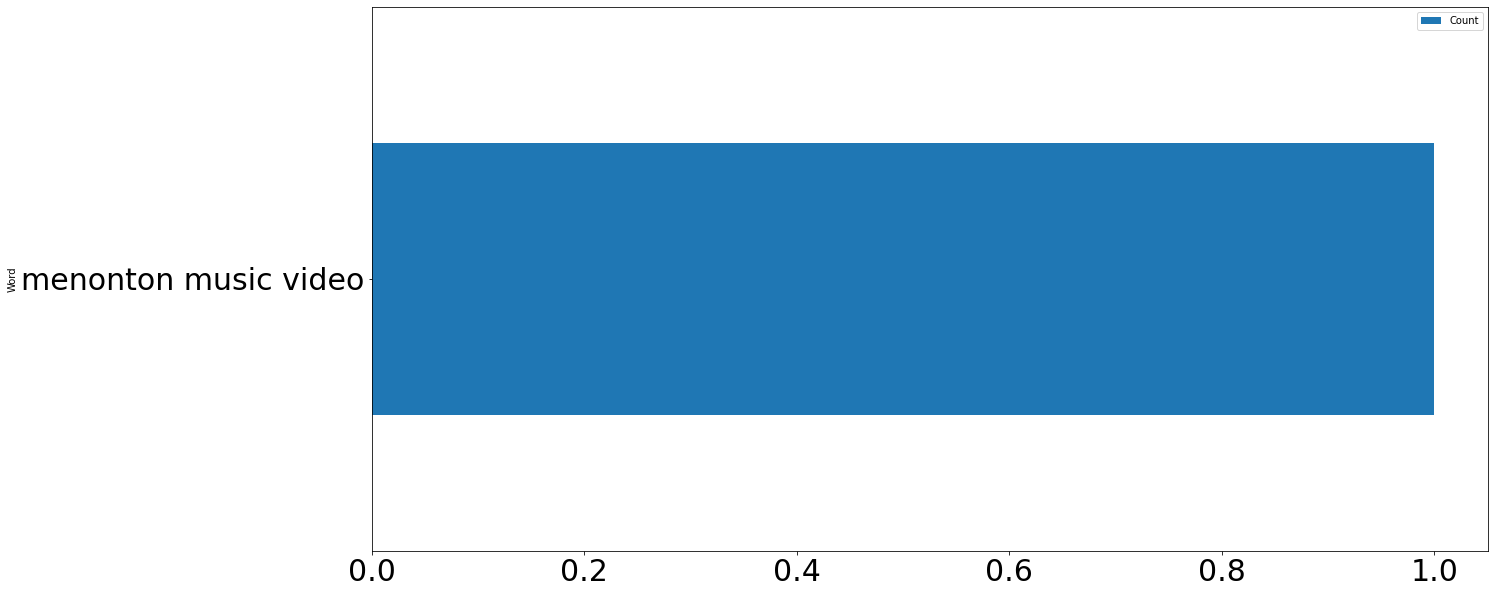

In [ ]:
df_top_negative_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi2.png',bbox_inches='tight')

Neutral

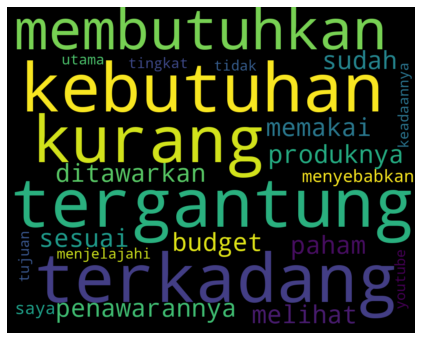

In [ ]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NET_data['Alasan_Membeli_Produk']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Unigrams
neutral_unigrams = defaultdict(int)

for tweet in NET_data['Alasan_Membeli_Produk']:
    for word in generate_ngrams(tweet):
        neutral_unigrams[word] += 1
         
df_top_neutral = pd.DataFrame(sorted(neutral_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral = df_top_neutral.rename(columns={0:'Word',1:'Count'})

# Bigrams
neutral_bigrams = defaultdict(int)

for tweet in NET_data['Alasan_Membeli_Produk']:
    for word in generate_ngrams(tweet,n_gram=2):
        neutral_bigrams[word] += 1
        
df_top_neutral_bi = pd.DataFrame(sorted(neutral_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_bi = df_top_neutral_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
neutral_trigrams = defaultdict(int)

for tweet in NET_data['Alasan_Membeli_Produk']:
    for word in generate_ngrams(tweet,n_gram=3):
        neutral_trigrams[word] += 1
        
df_top_neutral_tri = pd.DataFrame(sorted(neutral_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_tri = df_top_neutral_tri.rename(columns={0:'Word',1:'Count'})


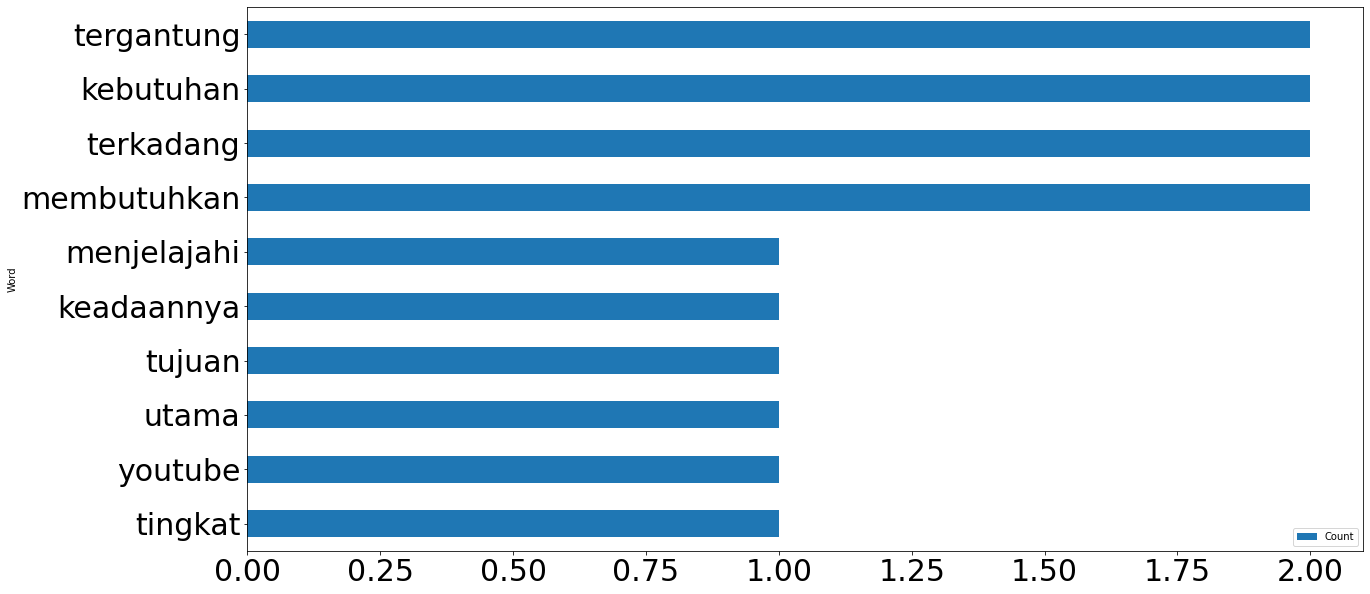

In [ ]:
df_top_neutral.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('huhu.png',bbox_inches='tight')

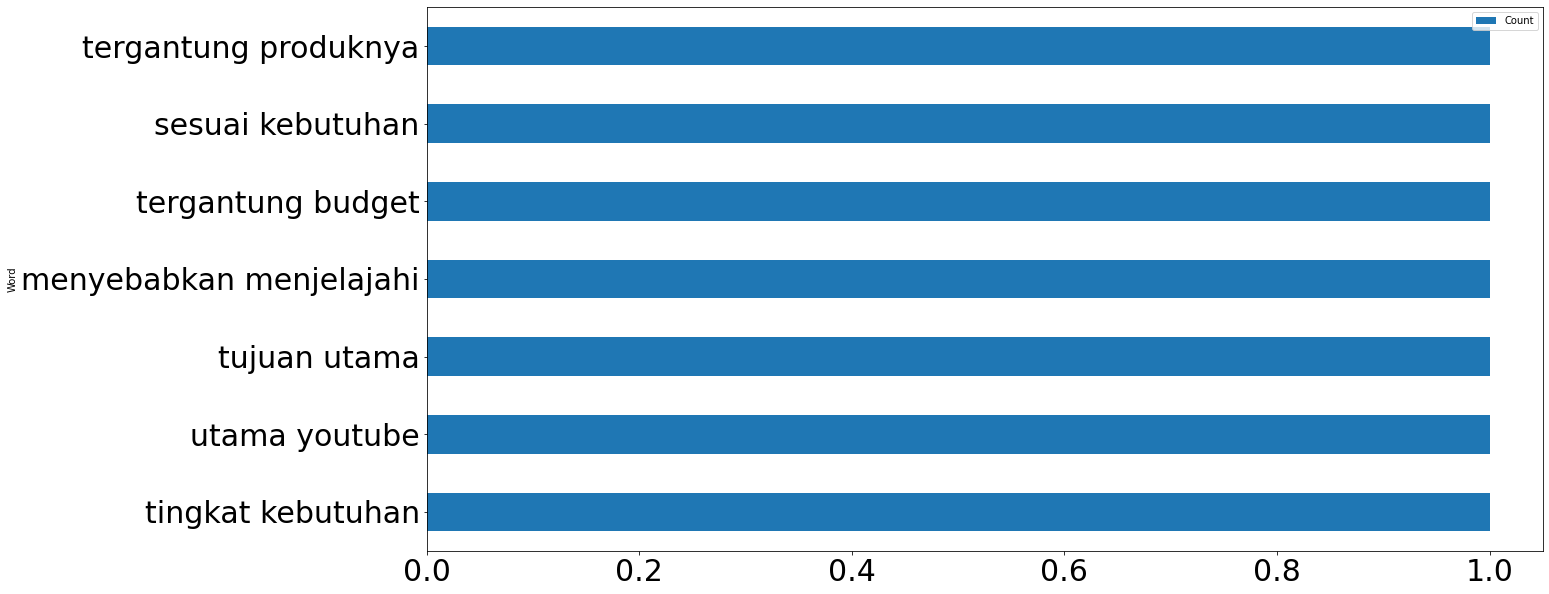

In [ ]:
df_top_neutral_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('huhu1.png',bbox_inches='tight')

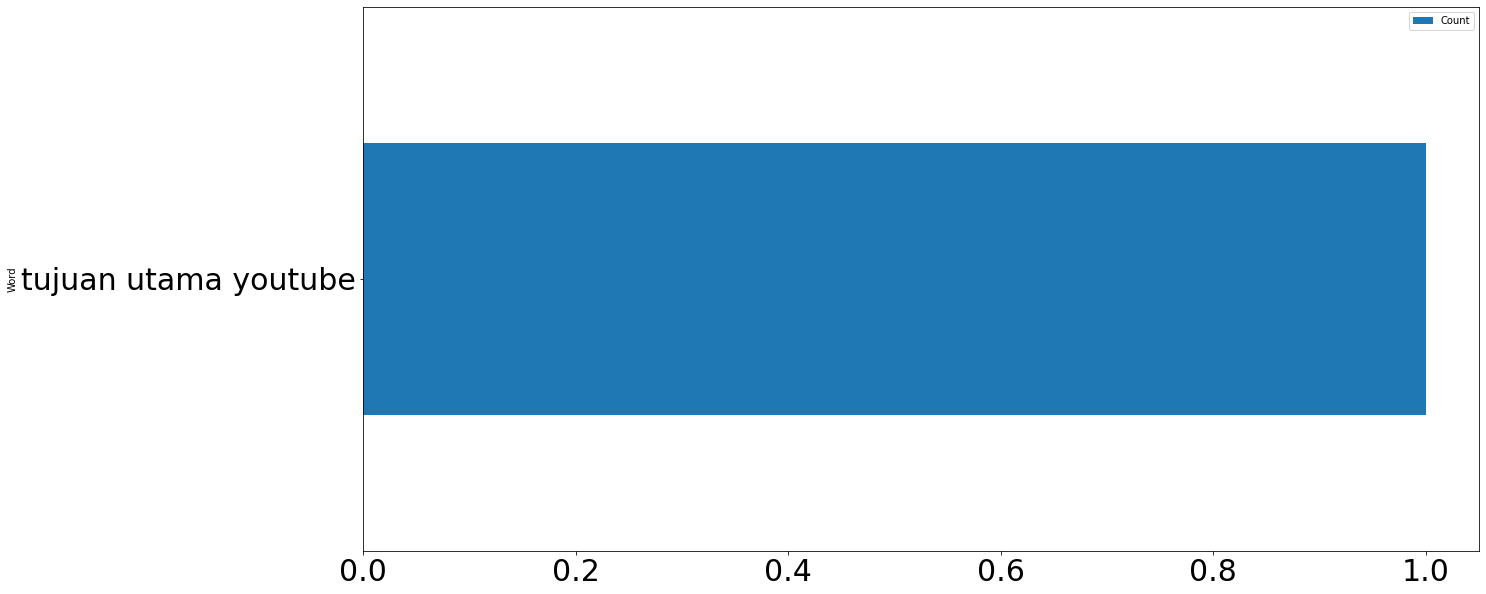

In [ ]:
df_top_neutral_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('huhu2.png',bbox_inches='tight')